# E20- Neural Networks in Keras 

Use keras framework to solve the below exercises.


In [21]:
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt

## 20.1 Predicting Student Admissions with Neural Networks

In this notebook, we predict student admissions to graduate schools based on six pieces of data:

1. GRE Scores (Test)
2. TOEFL Scores (Test)
3. University Ranking (1-5)
4. Statement of Purpose (SOP) and Letter of Recommendation Strength ( out of 5 )
5. Undergraduate GPA Scores (Grades)
6. Research Experience ( either 0 or 1 )

**Exercise:** Design and train a shallow neural network to predict the chance of Admission for each entry. Choose the number of hidden layer and neurons that minimizes the error. 

In [22]:
# Import dataset

data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [23]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [24]:
X = data.drop(data.columns[-1], axis=1)
Y = data[data.columns[-1]]

In [25]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

In [26]:
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [27]:
from sklearn.preprocessing import StandardScaler
Stand=StandardScaler()
Stand.fit(X)

C:\Users\robert.angarita\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
X_train = pd.DataFrame(data=Stand.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
X_test = pd.DataFrame(data=Stand.transform(xTest), columns=xTest.columns, index=xTest.index)

C:\Users\robert.angarita\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
C:\Users\robert.angarita\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [29]:
X_train = np.array(X_train)
y_train = np.array(yTrain)

In [30]:
X_test = np.array(X_test)
y_test = np.array(yTest)

In [31]:
X_train.shape, y_train.shape

((350, 7), (350,))

In [54]:
y_train=np.array(y_train,ndmin=2).T
X_train.shape, y_train.shape

((350, 7), (350, 1))

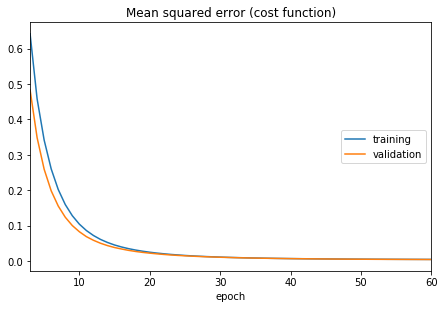

Mean squared error (cost function):
training   (min:    0.004, max:    2.908, cur:    0.004)
validation (min:    0.004, max:    1.526, cur:    0.004)


In [59]:
from keras import backend as K
import keras.optimizers as opts
from livelossplot import PlotLossesKeras
K.clear_session()
model = Sequential()
model.add(Dense(y_train.shape[1], input_shape=(X_train.shape[1],)))
op = opts.SGD(lr=0.01)
model.compile(loss = 'mean_squared_error',optimizer = op)

model.fit(X_train, y_train,verbose=3,epochs=60,validation_data=[X_test,y_test],callbacks=[PlotLossesKeras()])

# 20.2 Decision Boundary --  Moons Dataset 

**Exercise:** Use keras framework to find a decision boundary for point in the make_moons.

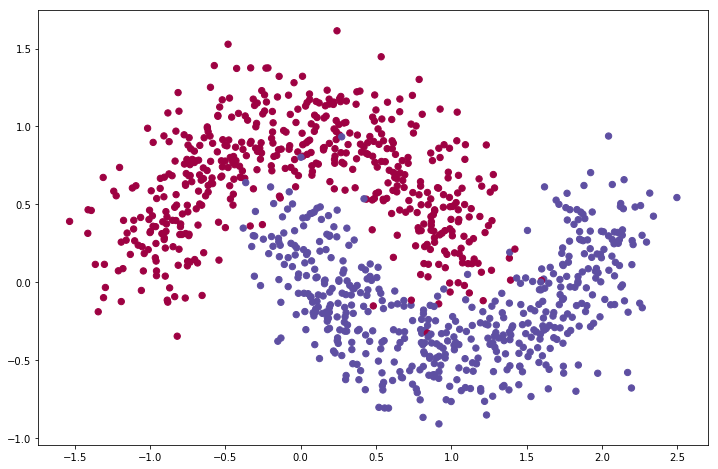

In [61]:
# Create moons dataset.

from sklearn.datasets.samples_generator import make_moons

x_train, y_train = make_moons(n_samples=1000, noise= 0.2, random_state=3)
plt.figure(figsize=(12, 8))
plt.scatter(x_train[:, 0], x_train[:,1], c=y_train, s=40, cmap=plt.cm.Spectral);

**Hint:** Use the next function to plt the decision boundary,

In [62]:
x_test, y_test = make_moons(n_samples=100, noise= 0.2, random_state=3)

In [63]:
model = 'Sequential neural network in keras'

def plot_decision_region(model, X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            '''
            Here 'model' is the neural network you previous trained.
            '''
            ZZ[i, j] = pred_fun(model, XX[i, j], YY[i, j])
    plt.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= 0, vmax=1)
    plt.colorbar()
    plt.xlabel("x")
    plt.ylabel("y")
    
def pred_fun(model,x1, x2):
    '''
    Here 'model' is the neural network you previous trained.
    '''
    xval = np.array([[x1, x2]])
    return model.predict(xval)[0, 0]

In [64]:
X = np.concatenate((x_test,x_train),axis=0 )
X.shape

(1100, 2)

In [65]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [66]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [67]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [68]:
y_train=np.array(y_train, ndmin=2).T
y_test=np.array(y_test, ndmin=2).T
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((350, 7), (1000, 1), (150, 7), (100, 1))

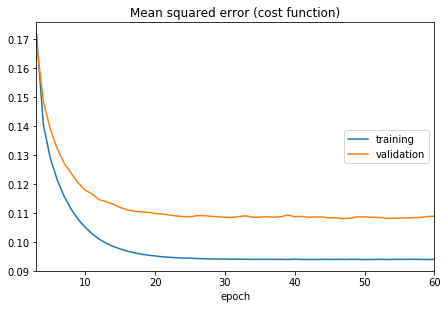

Mean squared error (cost function):
training   (min:    0.094, max:    1.501, cur:    0.094)
validation (min:    0.108, max:    0.638, cur:    0.109)


In [69]:
K.clear_session()

model = Sequential()
model.add(Dense(y_train.shape[1], input_shape=(x_train.shape[1],)))
op = opts.SGD(lr=0.01)
model.compile(loss = 'mean_squared_error',optimizer = op)
model.fit(x_train, y_train,verbose=3, epochs=60, validation_data=[x_test,y_test],callbacks=[PlotLossesKeras()])

In [ ]:
plt.figure(figsize = (8,16/3))    
'''
Here 'model' is the neural network you previous trained.
'''
#pred_fun = model.predict
plot_decision_region(model, x_train, pred_fun)
#plot_data(x_train, y_train)